# Introduction to RL, MDPs, and exact solutions
## Deep RL Bootcamp - Florida International University
### Miguel Alonso Jr - Associate Professor of Computer Science
October 2019

# Logistics

* Laptop setup - see [Deep RL ](https://github.com/drmaj/Deep-RL-Docker-Setup)
* Register on the [Moodle](https://moodle.cis.fiu.edu/v3.1/login/index.php) course
* Register on [Jupyter Hub](https://drlbc.cs.fiu.edu)
* Keep your laptops charged!
* 2 - 2hr sessions per day - 5 days

# Goals

After completing this course, students will be able to:
1. Master fundamental concepts in Deep RL;
2. Master problems to which Deep RL can be applied;
3. Demonstrate various Deep RL solutions for Model-free and Model-based problems;
4. Demonstrate state-of-the-art methods in Deep RL from scratch;
5. Demonstrate the ability to solve machine learning problems in new domains using Deep RL.

# Bootcamp Schedule

| Day | Date       | Session |                             Description                             |                 Materials                 |
|:---:|------------|:-------:|:-------------------------------------------------------------------:|:-----------------------------------------:|
|  1  | 10/24/2019 |    1    |             Introduction to RL, MDPs and Exact Solutions            | S1 Jupyter Notebook, Deep RL Docker Setup |
|     |            |    2    |                        Intro to Deep Learning                       |            S2 Jupyter Notebook            |
|  2  | 10/31/2019 |    3    |      Model-free - Value-based methods - Deep Q-Learning and DQN     |            S3 Jupyter Notebook            |
|     |            |    4    | Model-free - Policy Gradient methods - Proximal Policy Optimization |             S4 Jupter Notebook            |
|  3  | 11/7/2019  |    5    |                  Model-based Methods - Deep Dyna-Q                  |            S5 Jupyter Notebook            |
|     |            |    6    |         Deep RL in Online Settings - Deep Contextual Bandits        |            S6 Jupyter Notebook            |
|  4  | 11/14/2019 |    7    |        Partially Observable MDPs - Deep Recurrent Q-Learning        |            S7 Juptyer Notebook            |
|     |            |    8    |                              Inverse RL                             |            S8 Jupyter Notebook            |
|  5  | 11/21/2019 |    9    |                           Case Study: TBD                           |            S9 Jupyter Notebook            |
|     |            |    10   |                           Case Study: TBD                           |            S10 Jupyter Notebook           |


# Markov Decision Processes

![markov decision process](http://billy-inn.github.io/images/rl1.1.png)
(Source: Sutton and Barto, Reinforcment Learing: An Introduction )

# Formal Definition of MDP

An MDP is a tuple $(S, A, {P_sa}, \gamma, R)$, where:
* $S$ is a set of states, $S \in \{s_0, s_1, \dots s_m\}$
* $A$ is a set of actions, $A \in \{a_0, a_1, \dots a_m\}$
* $P_{a}(s, s')$ are the state transition probabilities given an action $a$.
* $\gamma$  is called the discount factor, and controls the influence of future rewards in the present, and is on the interval $[0, 1]$
* $R:S \times A \mapsto \mathbb{R}$ is the **reward function**, which returns a real value every time the agent moves from one state to the other due to an action.
* $H$ is the time horizon (can be finite or infinite)

# MDP Key Points

* For each state $s \in S$ and action $a \in A$, $P_{sa}$ is a probability distribution over the state space. $P_{sa}$ gives the distribution over what states the system will transition to if action $a$ is taken when the system is in state $s$.
*  $\{\gamma \in \mathbb{R} \hspace{1mm}| \hspace{1mm}0 \leq \gamma \leq 1\}$ 
* Sometimes the reward function is written as a function of the state only, $R:S \mapsto \mathbb{R}$
* The reward function can be written as $R(s, a, s')$

# Example MDP: Gridworld
Simple gridworld from Artificial Intelligence: A modern approach - Russel and Norvig

In [1]:
import gym # import openai gym
import gridworldsgym # import gridworldsgym - see: https://github.com/drmaj/gridworldsgym
from gridworldsgym.envs import gridworld

# make gridworld environment
env = gym.make('GridWorld-v0')
# print number of states and actions
env.num_actions, env.num_states

(4, 12)

# Example MDP: Gridworld

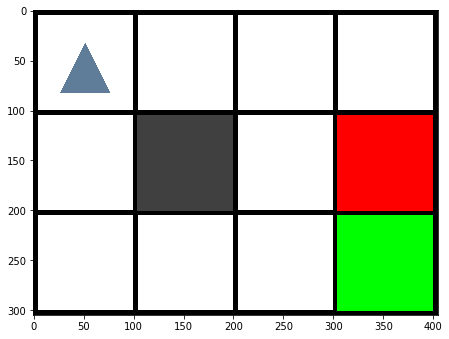

In [2]:
# we'll need these to display the gym's output
%matplotlib inline
from IPython import display
import matplotlib
import matplotlib.pyplot as plt 
plt.rcParams['figure.figsize'] = [7.25, 7.25]
state = env.reset()
plt.imshow(env.render(mode='rgb_array'))
env.close()

In [3]:
print(state)

0


# Move to the right

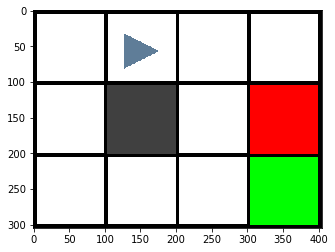

In [4]:
state, reward, done, info = env.step(gridworld.RIGHT)
plt.imshow(env.render(mode='rgb_array'))
env.close()

In [5]:
state, reward

(1, -0.04)

# What's the point? Solving MDPs

The goal when solving MDPs is to maximize the expected reward over time. In otherwords,

$$\max_{\pi} \mathrm{E}\left[\sum_{t=0}^{H} \gamma^{t} R\left(S_{t}, A_{t}, S_{t+1}\right) | \pi\right]$$

Thus, given and MPD $(S, A, P, R, \gamma, H)$, our goal is to find the optimal policy $\pi^*$

- Exact Methods:
    - **Value iteration**
    - Policy iteration

# The Value function and $V^*$

The value function:

$$V(s)=\mathbb{E}\left[\sum_{t=0}^{H} \gamma^{t} R\left(s_{t}, a_{t}, s_{t+1}\right), s_{0}=s\right]$$

The optimal value function:

$$V^{*}(s)=\max _{\pi} \mathbb{E}\left[\sum_{t=0}^{H} \gamma^{t} R\left(s_{t}, a_{t}, s_{t+1}\right) | \pi, s_{0}=s\right]$$

# The Value function and $V^*$

In plain english, the optimal value function is the expected value of accumulated rewards from starting in state $s$ and acting optimally from that point forward (and the optimal value function obey's the Bellman equations) Once we have that value function the optimal policy to follow given the agents current state, $\pi^*(s)$, is simply that action that yields the maximum value for the next step. This is summarized below:

$$V^*(s) = R(s) + \gamma \underset{a \in A}{\text{ max}} \sum_{s'}P(s,a,s')V^*(s')$$

$$\pi^*(s) = \underset{a \in A}{\text{argmax}}\sum_{s'}P(s,a,s')V^*(s')$$

# The Optimal Value Function $V^*$

Let's assume that $\gamma$=0.9 with $H=100$ and fully deterministic actions. Compute $V^*(s)$ for the simple gridworld example for each starting state. Note: each state has a reward of -0.04, the goal state has a reward of +1 and the terminal state has a reward of -1.

- $s = (2, 2)$, $V^*(s) =$ ?
- $s = (0, 1)$, $V^*(s) =$ ?
- $s = (0, 3)$, $V^*(s) =$ ?
- $s = (1, 2)$, $V^*(s) =$ ?

- $s = (2, 2)$, $V^*(s) =$ ?
- $s = (0, 1)$, $V^*(s) =$ ?
- $s = (0, 3)$, $V^*(s) =$ ?
- $s = (1, 2)$, $V^*(s) =$ ?

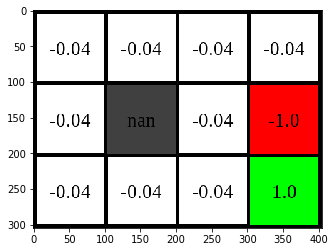

In [6]:
state = env.reset()
plt.imshow(env.render(mode='rgb_array', show_rewards=True))
env.close()

# The Optimal Value Function $V^*$

Let's assume that $\gamma$=0.9 with $H=100$ and slipper actions (there's an 80% chance that the desired action will result the desired move, and a 10% it will result in a slip to the left or to the right of the desired direction). Compute $V^*(s)$ for the simple gridworld example for each starting state. Note: each state has a reward of -0.04, the goal state has a reward of +1 and the terminal state has a reward of -1.

- $s = (2, 2)$, $V^*(s) =$ ?
- $s = (0, 1)$, $V^*(s) =$ ?
- $s = (0, 3)$, $V^*(s) =$ ?
- $s = (1, 2)$, $V^*(s) =$ ?

- $s = (2, 2)$, $V^*(s) =$ ?
- $s = (0, 1)$, $V^*(s) =$ ?
- $s = (0, 3)$, $V^*(s) =$ ?
- $s = (1, 2)$, $V^*(s) =$ ?

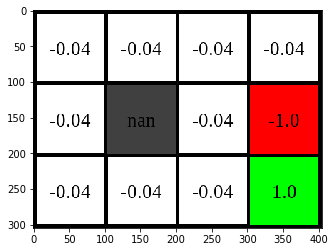

In [7]:
state = env.reset()
plt.imshow(env.render(mode='rgb_array', show_rewards=True))
env.close()

# Value Iteration

**function** Value-Iteration($mdp, \epsilon$) **returns** a value function<br>
&emsp; **inputs**: $mdp$, an MDP with states $S$, actions $A$, transition model $P_a(s, s')$, rewards $R(s,a,s')$, discount $\gamma$<br>
&emsp;&emsp;&emsp;&emsp;&emsp;$\epsilon$, the maximum error allowed in the value function of any state<br>
&emsp;**local variables**: $V$, $V'$, vectors of value function for states in $S$, initially zero<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\delta$, the maximum change in the value function of any state in an iteration<br>
&emsp;**repeat**<br>
&emsp;&emsp;$V \leftarrow V'; \delta \leftarrow 0$<br>
&emsp;&emsp;**for each** state $s$ **in** S **do**<br>
&emsp;&emsp;&emsp;$V'[s] \leftarrow R(s) + \gamma \underset{a \in A}{\text{ max }} \sum_{s'}P(s, s',a)V[s']$$ $<br>
&emsp;&emsp;&emsp;**if** $|V'[s]-V[s]| > \delta$<br>
&emsp;&emsp;&emsp;&emsp;**then** $\delta \leftarrow |V'[s]-V[s]|$<br>
&emsp;**until** $\delta < \epsilon(1 - \gamma)/\gamma$<br>
&emsp;**return** V

# Let's see this in action!

In [8]:
import time

GAMMA = 0.999

def value_iteration(env, epsilon=0.001, show_values=False):
    states = [s for s in range(env.num_states)]
    actions = [a for a in range(env.num_actions)]
    V1 = {s: 0.0 for s in states}
    R, P = env.R, env.P
    
    if show_values:
        img = plt.imshow(env.render(mode='rgb_array', values=V1)) # call this only once
    
    while True:
        V = V1.copy()
        if show_values:
            img.set_data(env.render(mode='rgb_array', values=V))
            display.display(plt.gcf())
            display.clear_output(wait=True)
            time.sleep(0.5)
        delta = 0
        for s in states:
            V1[s] = R(s) + GAMMA * max(sum(p * V1[s_prime] for (p, s_prime, done) in P(s, a)) for a in actions)
            delta = max(delta, abs(V1[s] - V[s]))

        if delta <= epsilon * (1 - GAMMA) / GAMMA:
            return V

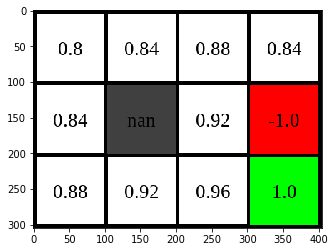

In [9]:
value_iteration(env, show_values=True)
env.close()

# Q-Values

There's another way to solve MDPs. Instead of simply learning a value (or utility) function, we can learn an expected utility for an agent that starts in state $s$ and takes an action $a$, and thereafter acts optimally. This is called a Q-value or an action-utility, $Q(s,a)$, and must also satisfy the following Bellman equation:

$$Q^*(s,a)= R(s) + \gamma \sum_{s'}P(s,a,s') \underset{a' \in A}{\text{ max }} Q^*(s',a')$$

with Q-Values directly related to utility values as follows:

$$V(s) = \underset{a \in A}{\text{ max }}Q(s,a)$$

# Q-Value Iteration

So what would Q-Value Iteration look like?

$$Q'[s,a] \leftarrow R(s) + \gamma \sum_{s'}P(s, s',a)\underset{a' \in A}{\text{ max }}Q[s', a']$$ 


In [10]:
import copy

def q_value_iteration(env, epsilon=0.001):
    states = [s for s in range(env.num_states)]
    actions = [a for a in range(env.num_actions)]
    Q1 = {s: {a: 0.0 for a in actions} for s in states}
    R, P = env.R, env.P

    while True:
        Q = copy.deepcopy(Q1)
        delta = 0
        for s in states:
            for a in actions:
                # Q1[s] = R(s) + GAMMA * max(sum(p * V1[s_prime] for (p, s_prime, done) in P(s, a)) for a in actions)
                Q1[s][a] = R(s) + GAMMA * sum(p*max(Q1[s_prime][a_prime] for a_prime in actions) for (p, s_prime, done) in P(s,a))
                delta = max(delta, abs(Q1[s][a] - Q[s][a]))

        if delta <= epsilon * (1 - GAMMA) / GAMMA:
            return Q

In [11]:
q_value_iteration(env)[6]

{0: 0.8362458360409998,
 1: -1.039,
 2: 0.9180409999999999,
 3: 0.8771229589999998}

In [12]:
value_iteration(env)[6]

0.9180409999999999

# What's the point? Solving MDPs

The goal when solving MDPs is to maximize the expected reward over time. In otherwords,

$$\max_{\pi} \mathrm{E}\left[\sum_{t=0}^{H} \gamma^{t} R\left(S_{t}, A_{t}, S_{t+1}\right) | \pi\right]$$

Thus, given and MPD $(S, A, P, R, \gamma, H)$, our goal is to find the optimal policy $\pi^*$

- Exact Methods:
    - Value iteration
    - **Policy iteration**

# Policy Iteration

Aside from value iteration, there is a second commonly used algorithm for finding an optimal policy. It calculates both the optimal policy and the value function for all states simultaneously. The **policy iteration** algorithm alternates between **policy evaluation** (given a policy $\pi_i$ for iteration $i$, calculate the value function $V_i = V^{\pi_i}$ : the value function of each state if policy $\pi_i$ were to be executed) and **policy improvement** (calculate a new maximum expected value function policy $\pi_{i+1}$ using one-step look ahead based on $V_i$.

The algorithm is as follows:

**function** Policy-Iteration($mdp$) **returns** a policy<br>
&emsp; **inputs**: $mdp$, and MDP with states $S$, actions $A$, transition model $P(s,a,s')$, rewards $R(s)$, discount $\gamma$<br>
&emsp;**local variables**: $V$, a vector of value function values for states in $S$, initially zero<br>
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$\pi$, a policy vector indexed by state, intially random<br>
&emsp;**repeat**<br>
&emsp;&emsp;$V \leftarrow \text{Policy-Evaluation}(\pi, V, mdp)$<br>
&emsp;&emsp;$unchanged? \leftarrow \text{true}$<br>
&emsp;&emsp;**for each** state $s$ **in** S **do**<br>
&emsp;&emsp;&emsp;**if** $\underset{a \in A}{\text{ max}} \sum_{s'}P(s,a,s')V[s'] > \sum_{s'}P(s,\pi(s),s')V[s']$ **then do**<br>
&emsp;&emsp;&emsp;&emsp;$\pi[s] \leftarrow \underset{a \in A}{\text{argmax}}\sum_{s'}P(s,a,s')V(s')$<br>
&emsp;&emsp;&emsp;&emsp;$unchanged? \leftarrow \text{false}$<br>
&emsp;**until** $unchanged?$<br>
&emsp;**return** $\pi$

Note: that the policy evaluation step can be done via solving a simplified version of the Bellman equations directly. The intuition is as follows: this is much simpler because the action at each state is fixed by the policy. At the $i$-th iteration, the policy $\pi_i$ specifies the action $\pi_i(s)$ in state $s$. Therefore, the simplified Bellman equation for the value function is:

$$V_i(s)=R(s)+ \gamma \sum_{s'}P(s,\pi_i(s),s')V_i(s')$$

This insight allows us to write a system of linear equations. Thus for $n$ states we will have $n$ linear equations with $n$ unknowns, which can be solved using standard linear algebra methods.

For small state spaces, policy evaluation is often very fast and typically converges with very few iterations. However, for MDPs with large state spaces, value iteration will be preferred, since solving a large system of linear equations is difficult. Thus, in practice, value iteration is typically preferred.


# Lab 1 - Implementation of Policy Iteration on Gridworlds

Congratulations! You've made is to the end of the first session. Your task now is to implement Policy iteration for the GridWorld environments used in the examples in today's session.